In [1]:
import pandas as pd

# Read the CSV files into DataFrames
df_f1000 = pd.read_csv('f1000research.csv')
df_sw = pd.read_csv('semantic-web-journal-analysis.csv')

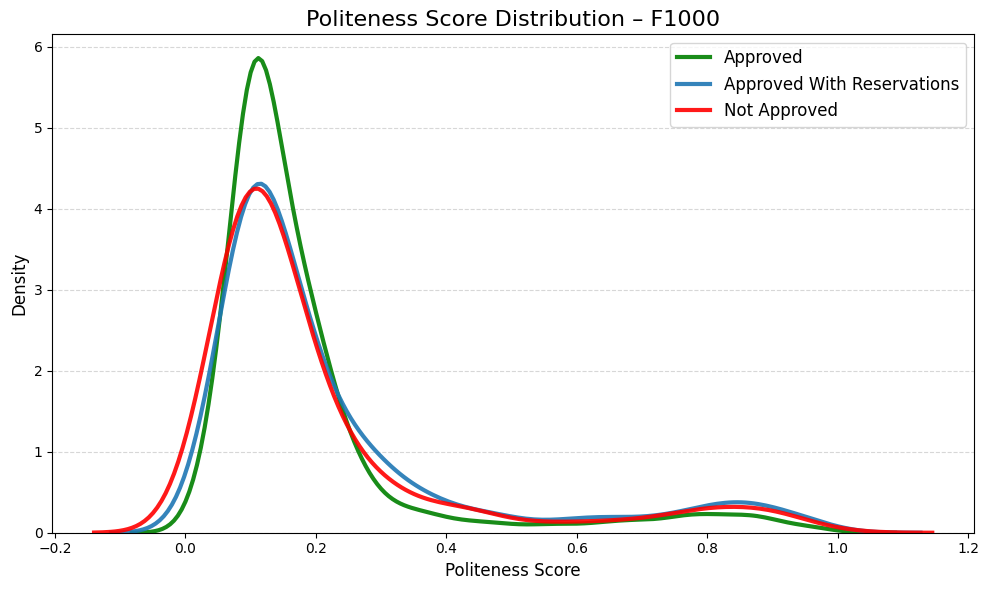

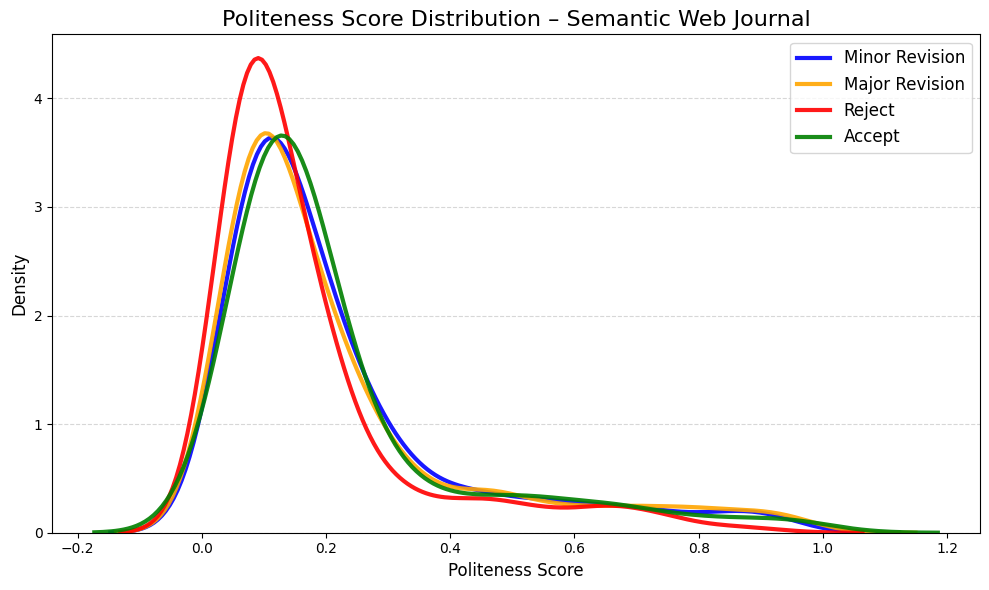

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# 0. filter df_sw to only these four suggestion types
keep = ['Minor Revision', 'Major Revision', 'Accept', 'Reject']
df_sw = df_sw[df_sw['review_suggestion'].isin(keep)].copy()

# 1. compute per-sample weights
for df in (df_f1000, df_sw):
    counts = df.groupby('review_suggestion')['review_suggestion'].transform('count')
    df['weight'] = 1.0 / counts  # so each group sums to 1

# color map for Accept/Reject
color_map = {
    'Accept': 'green',
    'Reject': 'red',
    'Approved': 'green',
    'Not Approved': 'red',
    'Minor Revision': 'blue',
    'Major Revision': 'orange'
}

# 2. define a plotting function with forced colors
def plot_politeness_distribution(df, title):
    plt.figure(figsize=(10, 6))
    for suggestion in df['review_suggestion'].unique():
        subset = df[df['review_suggestion'] == suggestion]
        # pick a forced color only for Accept/Reject
        kwargs = {}
        if suggestion in color_map:
            kwargs['color'] = color_map[suggestion]

        sns.kdeplot(
            data=subset,
            x='politeness_score',
            label=suggestion,
            weights=subset['weight'],
            fill=False,
            alpha=0.9,
            linewidth=3,
            **kwargs
        )

    plt.title(f"Politeness Score Distribution – {title}", fontsize=16)
    plt.xlabel("Politeness Score", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend(title="", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# 3. generate your two figures
plot_politeness_distribution(df_f1000, 'F1000')
plot_politeness_distribution(df_sw, 'Semantic Web Journal')

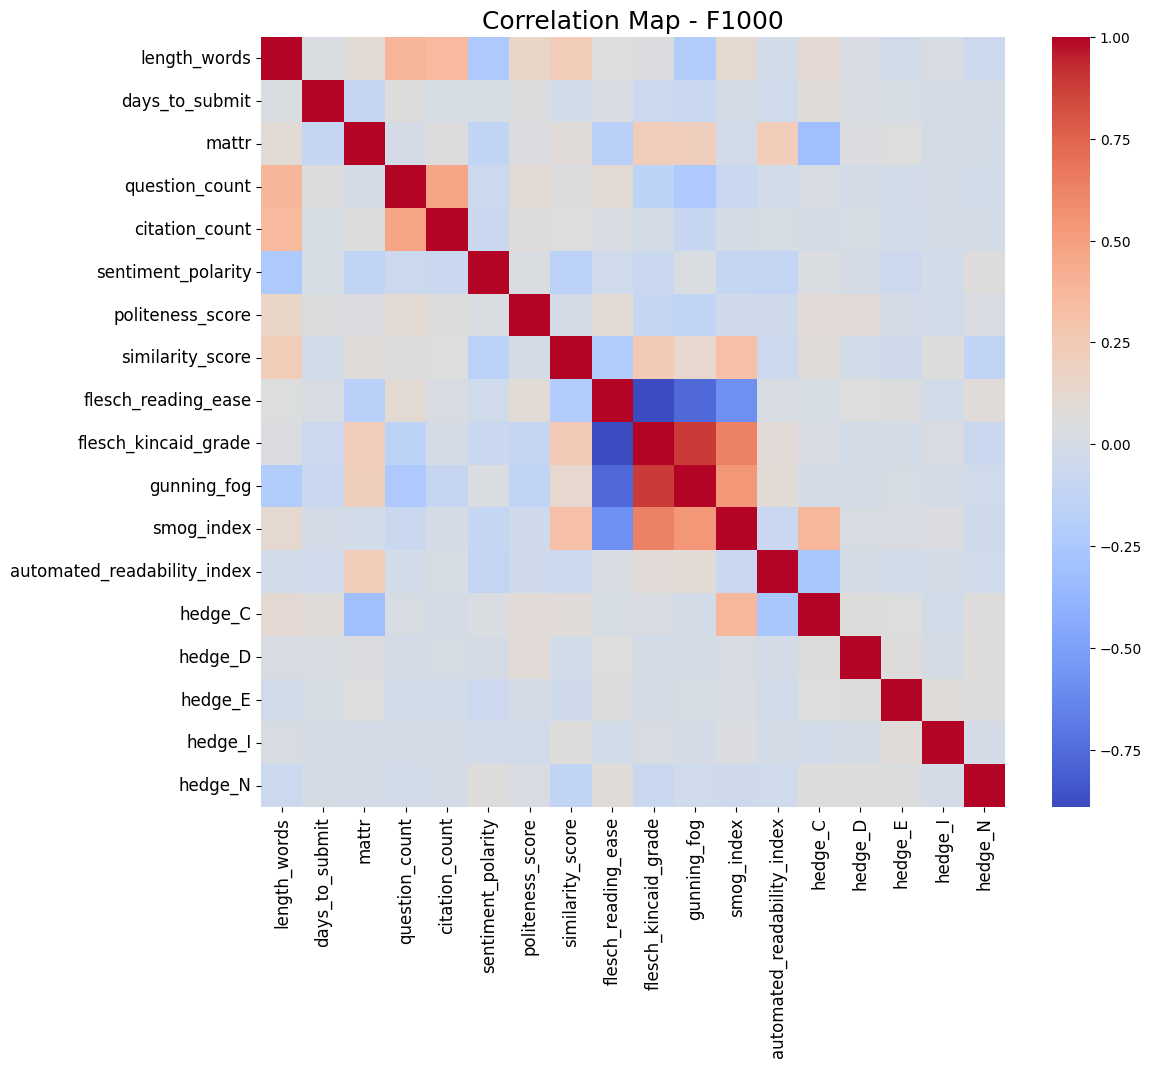

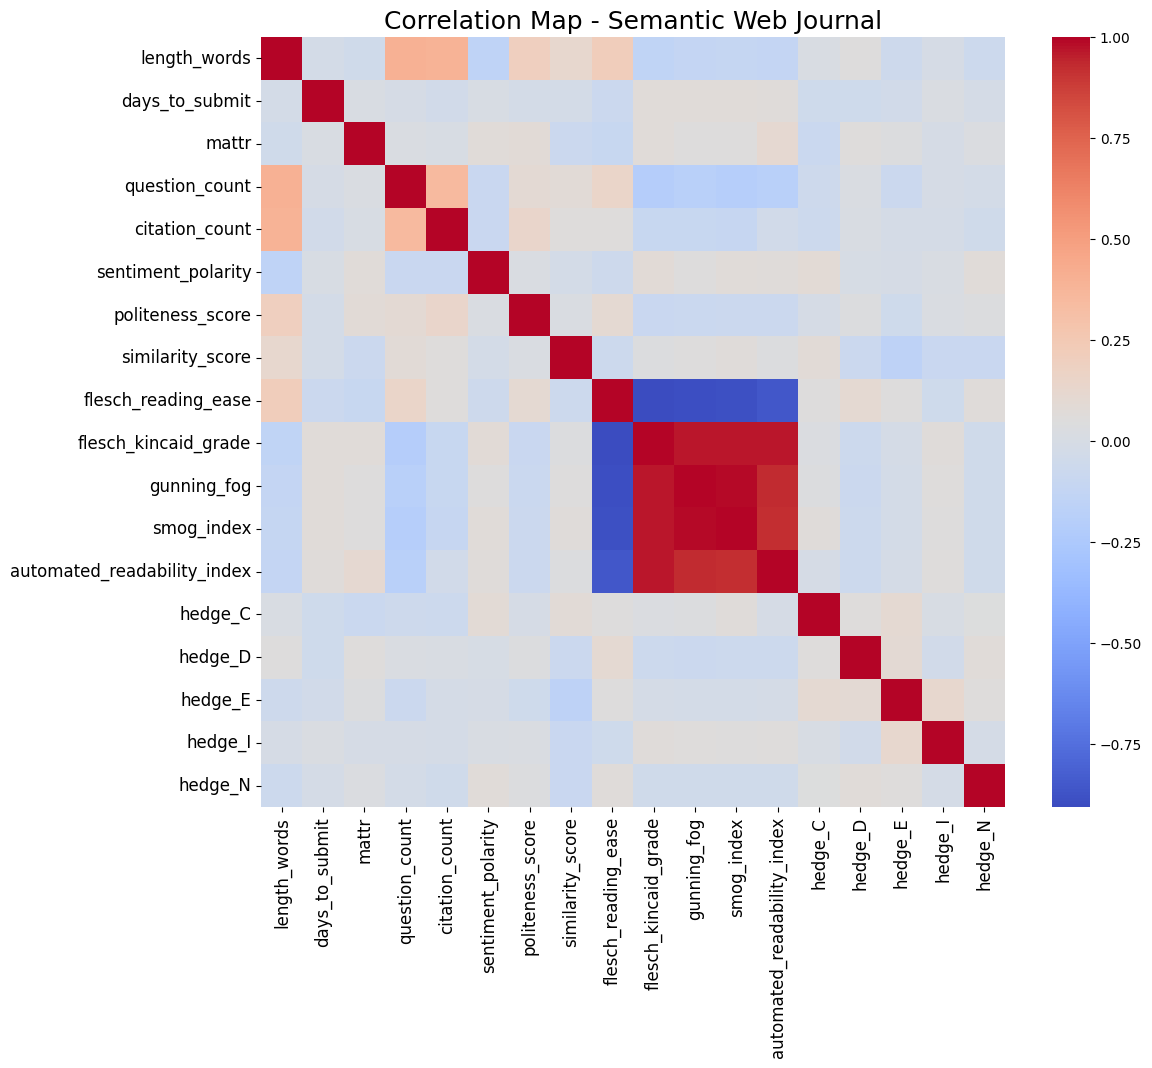

In [30]:
import seaborn as sns

import matplotlib.pyplot as plt

#drop columns starting with 'llm'
df_f1000 = df_f1000.loc[:, ~df_f1000.columns.str.startswith('llm')]
df_sw = df_sw.loc[:, ~df_sw.columns.str.startswith('llm')]

#drop columns with names ends with '.1'
df_f1000 = df_f1000.loc[:, ~df_f1000.columns.str.endswith('.1')]
df_sw = df_sw.loc[:, ~df_sw.columns.str.endswith('.1')]

#drop columns with names weight
df_f1000 = df_f1000.loc[:, ~df_f1000.columns.str.endswith('weight')]
df_sw = df_sw.loc[:, ~df_sw.columns.str.endswith('weight')]


# Function to plot correlation map
def plot_correlation_map(df, title):
    numerical_columns = df.select_dtypes(include=['float64', 'int64'])
    correlation_matrix = numerical_columns.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
    plt.title(title, fontsize=18)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Plot correlation maps for each dataframe
plot_correlation_map(df_f1000, 'Correlation Map - F1000')
plot_correlation_map(df_sw, 'Correlation Map - Semantic Web Journal')

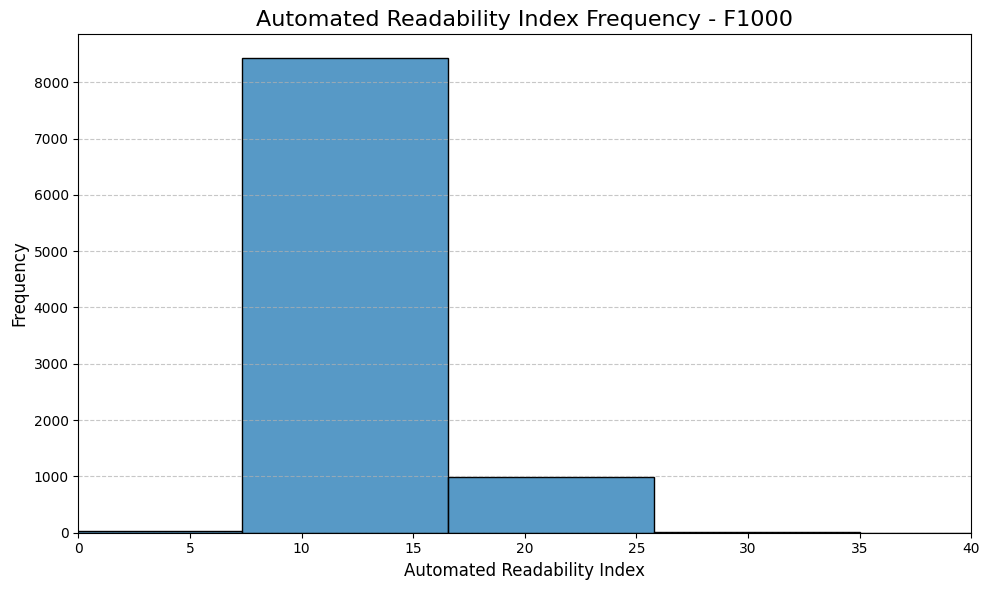

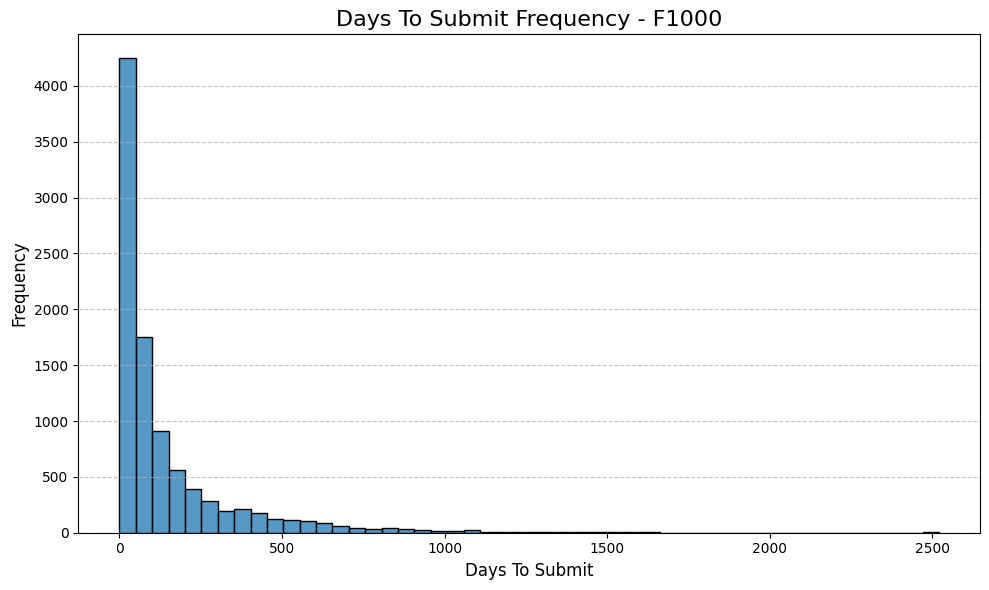

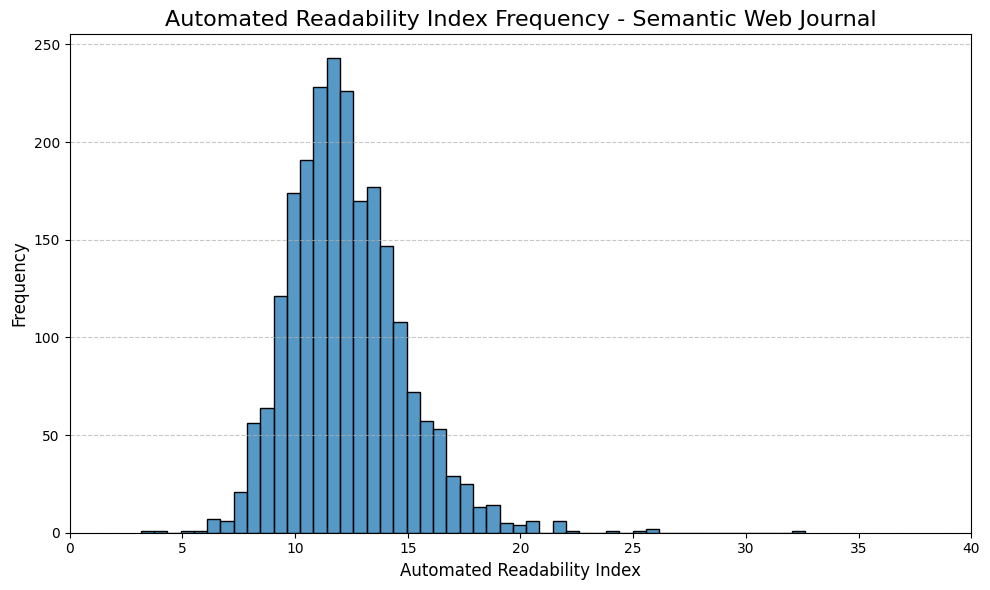

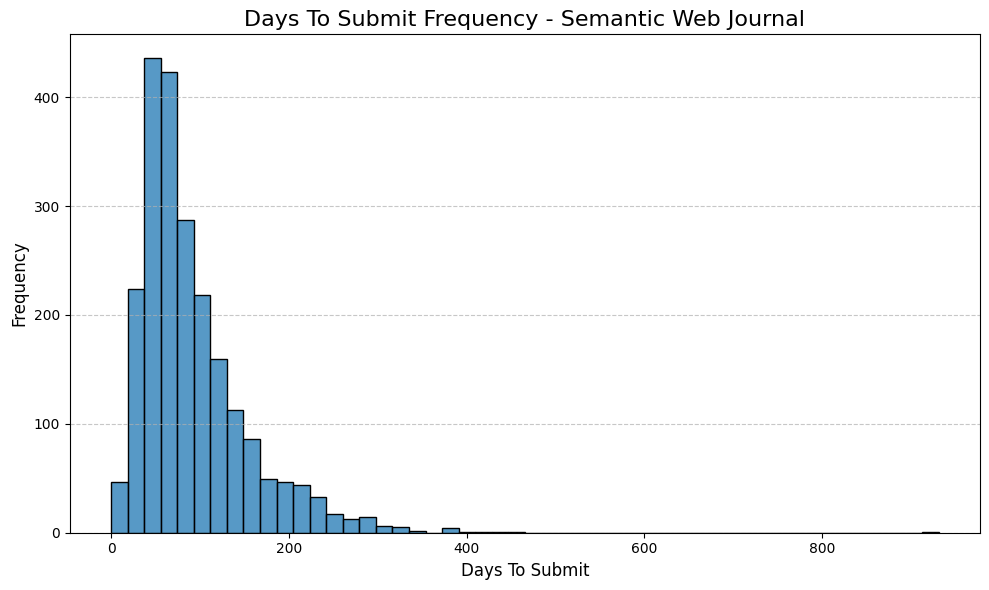

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_frequency(df, column, title, bins=50):
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=df,
        x=column,
        bins=bins,
        kde=False
    )
    # if this is the readability plot, limit x from 0 to 40
    if column == 'automated_readability_index':
        plt.xlim(0, 40)

    plt.title(f"{column.replace('_', ' ').title()} Frequency - {title}",
              fontsize=16)
    plt.xlabel(column.replace('_', ' ').title(), fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

for df, label in [(df_f1000, 'F1000'), (df_sw, 'Semantic Web Journal')]:
    for col in ['automated_readability_index', 'days_to_submit']:
        plot_frequency(df, col, label)

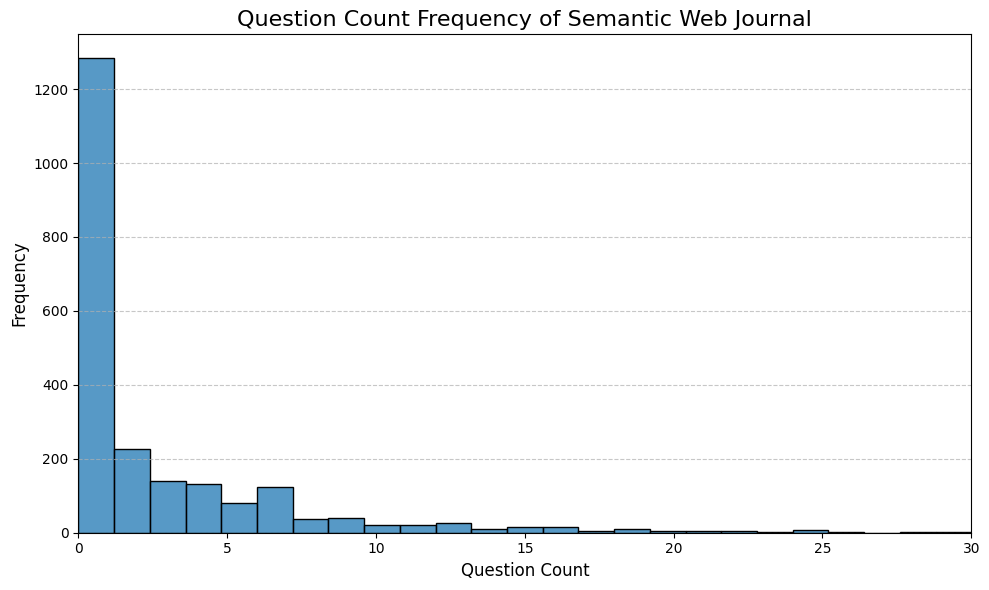

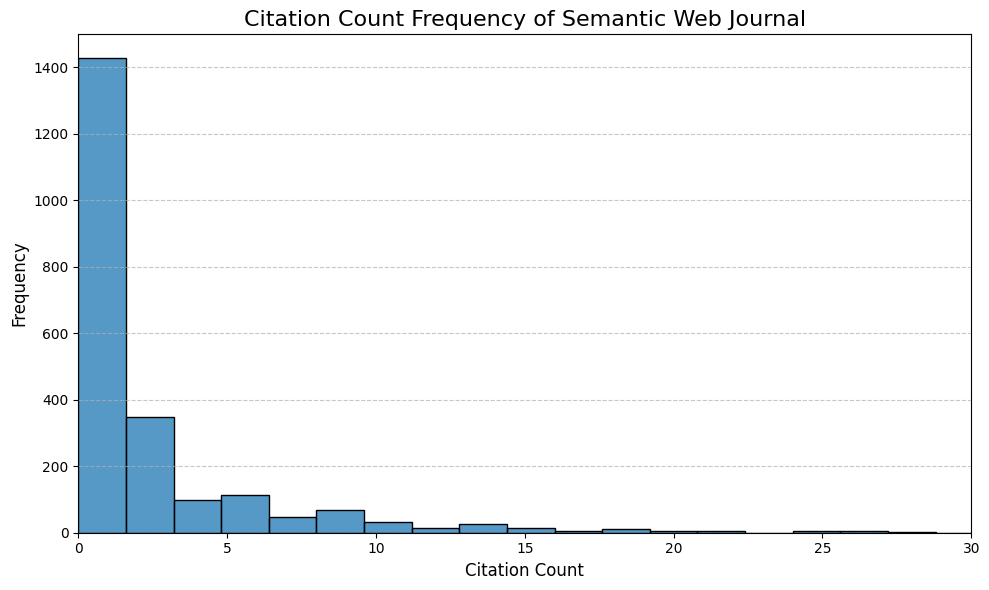

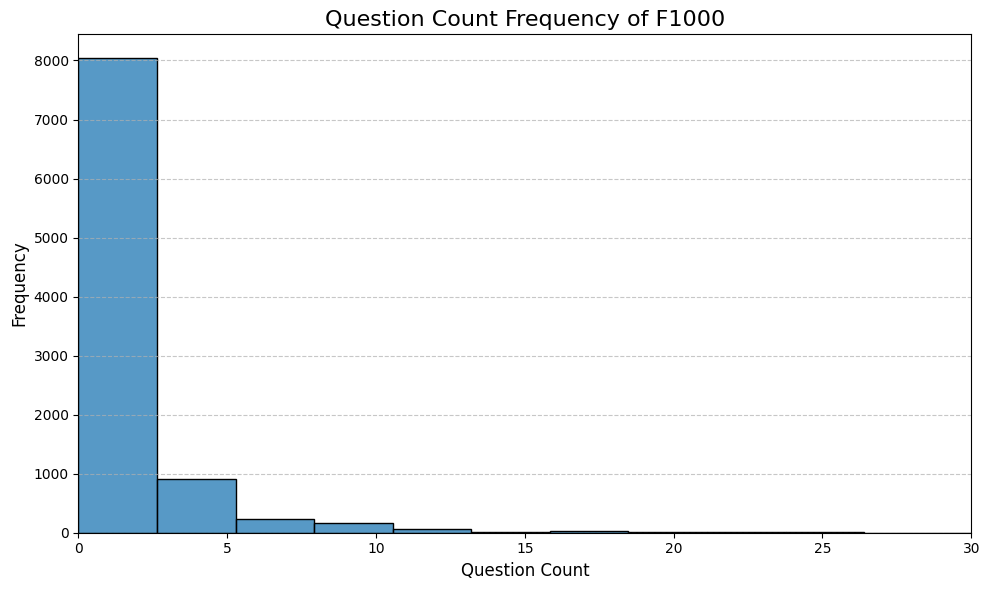

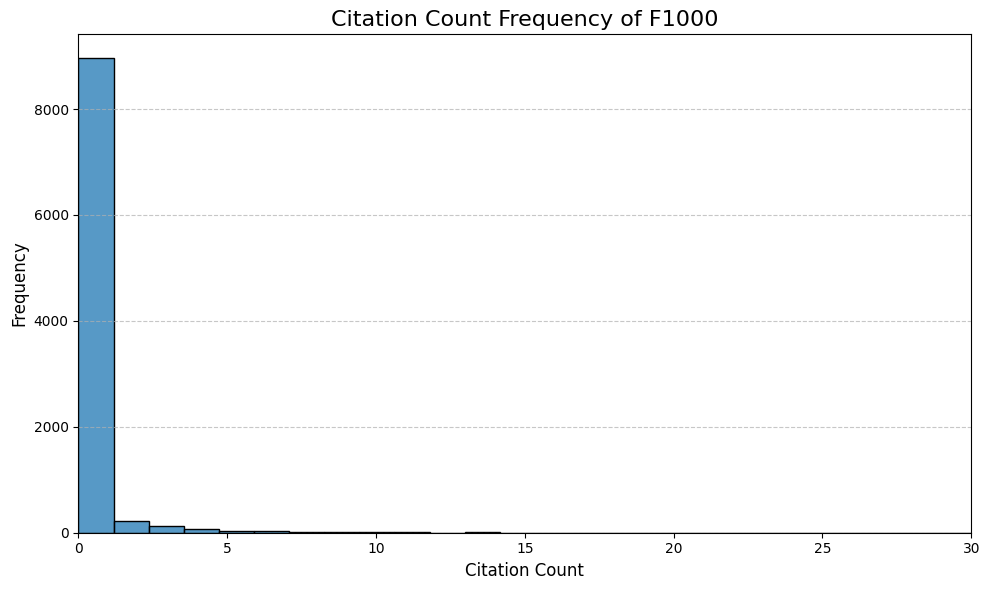

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_frequency(df, column, title, bins=50):
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=df,
        x=column,
        bins=bins,
        kde=False
    )
    # if this is the readability plot, limit x from 0 to 40
    if column == 'question_count':
        plt.xlim(0, 30)
    elif column == 'citation_count':
        plt.xlim(0, 30)
    
    plt.title(f"{column.replace('_', ' ').title()} Frequency of {title}",
              fontsize=16)
    plt.xlabel(column.replace('_', ' ').title(), fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


for df, label in [(df_sw, 'Semantic Web Journal'), (df_f1000, 'F1000')]:
    for col in ['question_count', 'citation_count']:
        plot_frequency(df, col, label)

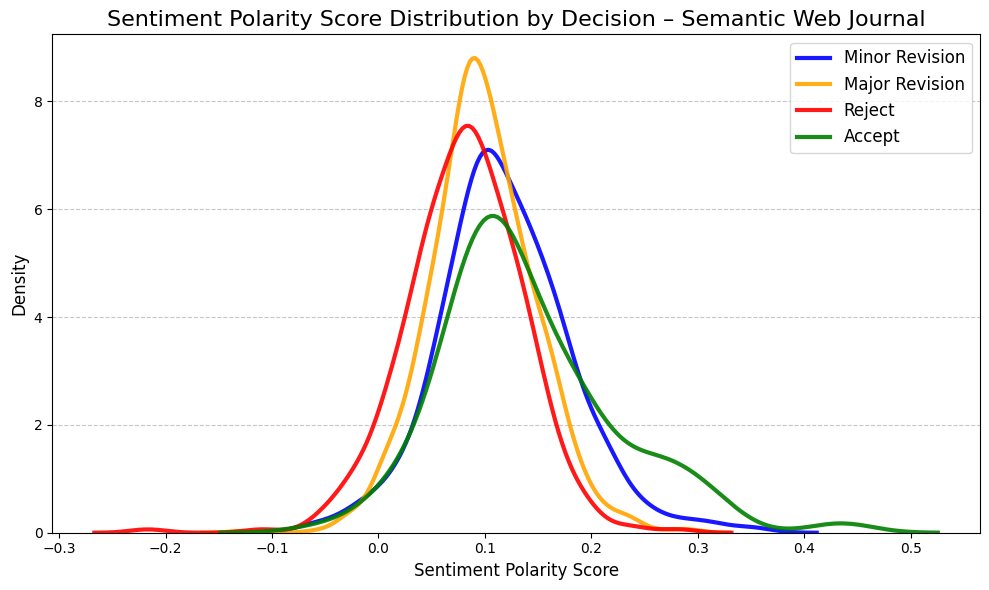

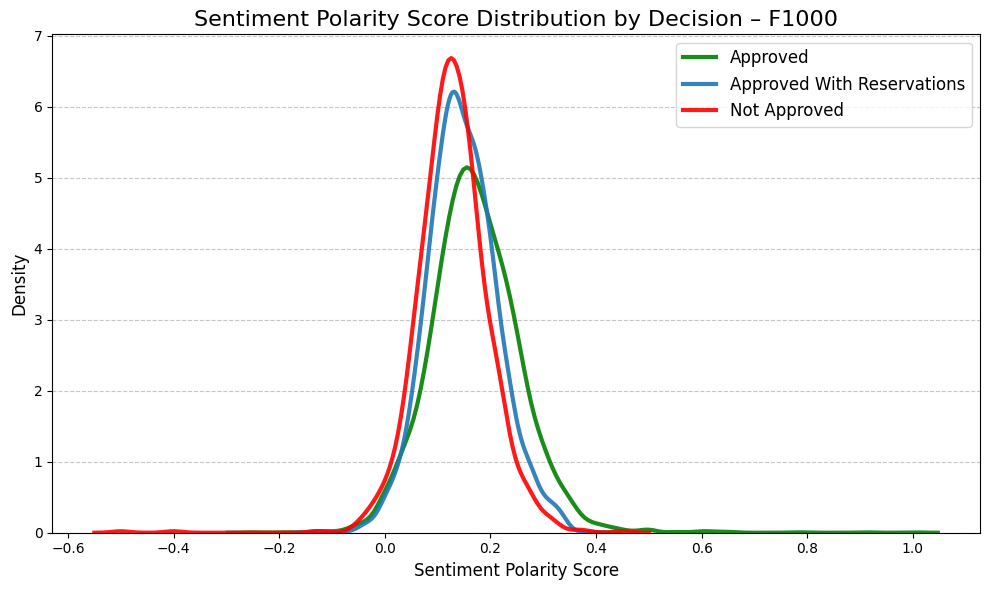

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# color map for suggestions/decisions
color_map = {
    'Accept': 'green',
    'Approved': 'green',
    'Reject': 'red',
    'Not Approved': 'red',
    'Minor Revision': 'blue',
    'Major Revision': 'orange'
}

def plot_polarity_distribution(df, title):
    df = df.copy()
    df['decision'] = df['review_suggestion']
    
    plt.figure(figsize=(10, 6))
    for decision in df['decision'].dropna().unique():
        subset = df[df['decision'] == decision]
        sns.kdeplot(
            data=subset,
            x='sentiment_polarity',
            label=decision,
            fill=False,
            alpha=0.9,
            linewidth=3,
            color=color_map.get(decision, None)
        )
    plt.title(f"Sentiment Polarity Score Distribution by Decision – {title}", fontsize=16)
    plt.xlabel("Sentiment Polarity Score", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend(title="", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot for Semantic Web Journal
plot_polarity_distribution(df_sw, 'Semantic Web Journal')

# Plot for F1000
plot_polarity_distribution(df_f1000, 'F1000')

In [45]:
df_sw

,paper_id,reviewer,review_date,review_suggestion,length_words,title,abstract,days_to_submit,review_text,mattr,...,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,hedge_C,hedge_D,hedge_E,hedge_I,hedge_N,decision
0,3654-4868,Anonymous,27/Aug/2024,Minor Revision,580,HiHo: A Hierarchical and Homogenous Subgraph L...,Relation prediction in Knowledge Graphs (KGs) ...,180,The paper proposed a new approach/method for K...,0.7774,...,8.742933,12.047477,11.961242,7.828529,96,0,0,0,0,Minor Revision
1,3654-4868,Janneth Chicaiza,03/Sep/2024,Minor Revision,363,HiHo: A Hierarchical and Homogenous Subgraph L...,Relation prediction in Knowledge Graphs (KGs) ...,187,The subject on which the proposal is focused i...,0.7642,...,16.505300,20.258512,18.026120,18.566694,81,0,1,0,0,Minor Revision
2,3654-4868,Anonymous,10/Sep/2024,Minor Revision,616,HiHo: A Hierarchical and Homogenous Subgraph L...,Relation prediction in Knowledge Graphs (KGs) ...,194,The paper introduces a novel approach to knowl...,0.7716,...,13.750030,16.562678,15.112258,14.149075,75,0,0,0,0,Minor Revision
3,3666-4880,Anonymous,16/Sep/2024,Major Revision,683,A Complex Network Model for Knowledge Graphs' ...,When dealing with Knowledge Graphs (KGs) struc...,189,The paper presents a novel approach to underst...,0.7592,...,8.713855,11.210210,11.282606,9.372677,109,0,0,0,0,Major Revision
4,3666-4880,Anonymous,30/Sep/2024,Major Revision,297,A Complex Network Model for Knowledge Graphs' ...,When dealing with Knowledge Graphs (KGs) struc...,203,This paper describes a complex network generat...,0.7742,...,10.512596,13.306288,13.310731,11.030018,103,1,1,0,0,Major Revision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332,400-1508,Anonymous,22/Mar/2013,Reject,583,The LEGO Unified Concepticon,The most widely available kind of linguistic d...,106,"I had difficulties in reading the paper, but I...",0.7775,...,10.673379,12.962661,12.827911,11.698217,64,1,0,0,1,Reject
2333,400-1508,Pablo Mendes,02/Apr/2013,Major Revision,474,The LEGO Unified Concepticon,The most widely available kind of linguistic d...,117,The article presents an interesting resource a...,0.7972,...,11.002437,14.722820,14.085920,10.975995,103,1,0,0,4,Major Revision
2334,392-1487,Jiewen Huang,25/Dec/2012,Major Revision,473,A Scalable RDF Data Processing Framework based...,In order to effectively handle the growing amo...,36,This paper proposes a salable RDF data managem...,0.7967,...,7.081384,9.027431,9.888513,6.616462,103,0,1,0,0,Major Revision
2335,392-1487,Marcin Wylot,05/Jan/2013,Reject,643,A Scalable RDF Data Processing Framework based...,In order to effectively handle the growing amo...,47,In the paper the authors want to tackle with R...,0.7704,...,11.986925,14.758065,13.939097,13.431461,98,0,0,0,0,Reject


In [46]:
import pandas as pd

df_sw_reviewer = pd.read_pickle('/home/ali/Review_Quality_Benchmark/Soroush/processed/sw_reviewers_similarity_info.pkl')

# 1. Turn your nested dict into a flat DataFrame
records = []
for paper_id, reviewers in df_sw_reviewer.items():
    for reviewer, metrics in reviewers.items():
        records.append({
            'paper_id':             paper_id,
            'reviewer':             reviewer,
            'max_similarity':       metrics.get('max_similarity'),
            'avg_similarity':       metrics.get('avg_similarity'),
            'avg_recent_similarity':metrics.get('avg_recent_similarity')
        })
df_sim = pd.DataFrame(records)

# 2. Merge onto your df_sw
df_sw = df_sw.merge(
    df_sim,
    on=['paper_id','reviewer'],
    how='left'
)

# 3. Force Anonymous rows to stay null
anon_mask = df_sw['reviewer'] == 'Anonymous'
df_sw.loc[anon_mask, ['max_similarity','avg_similarity','avg_recent_similarity']] = None


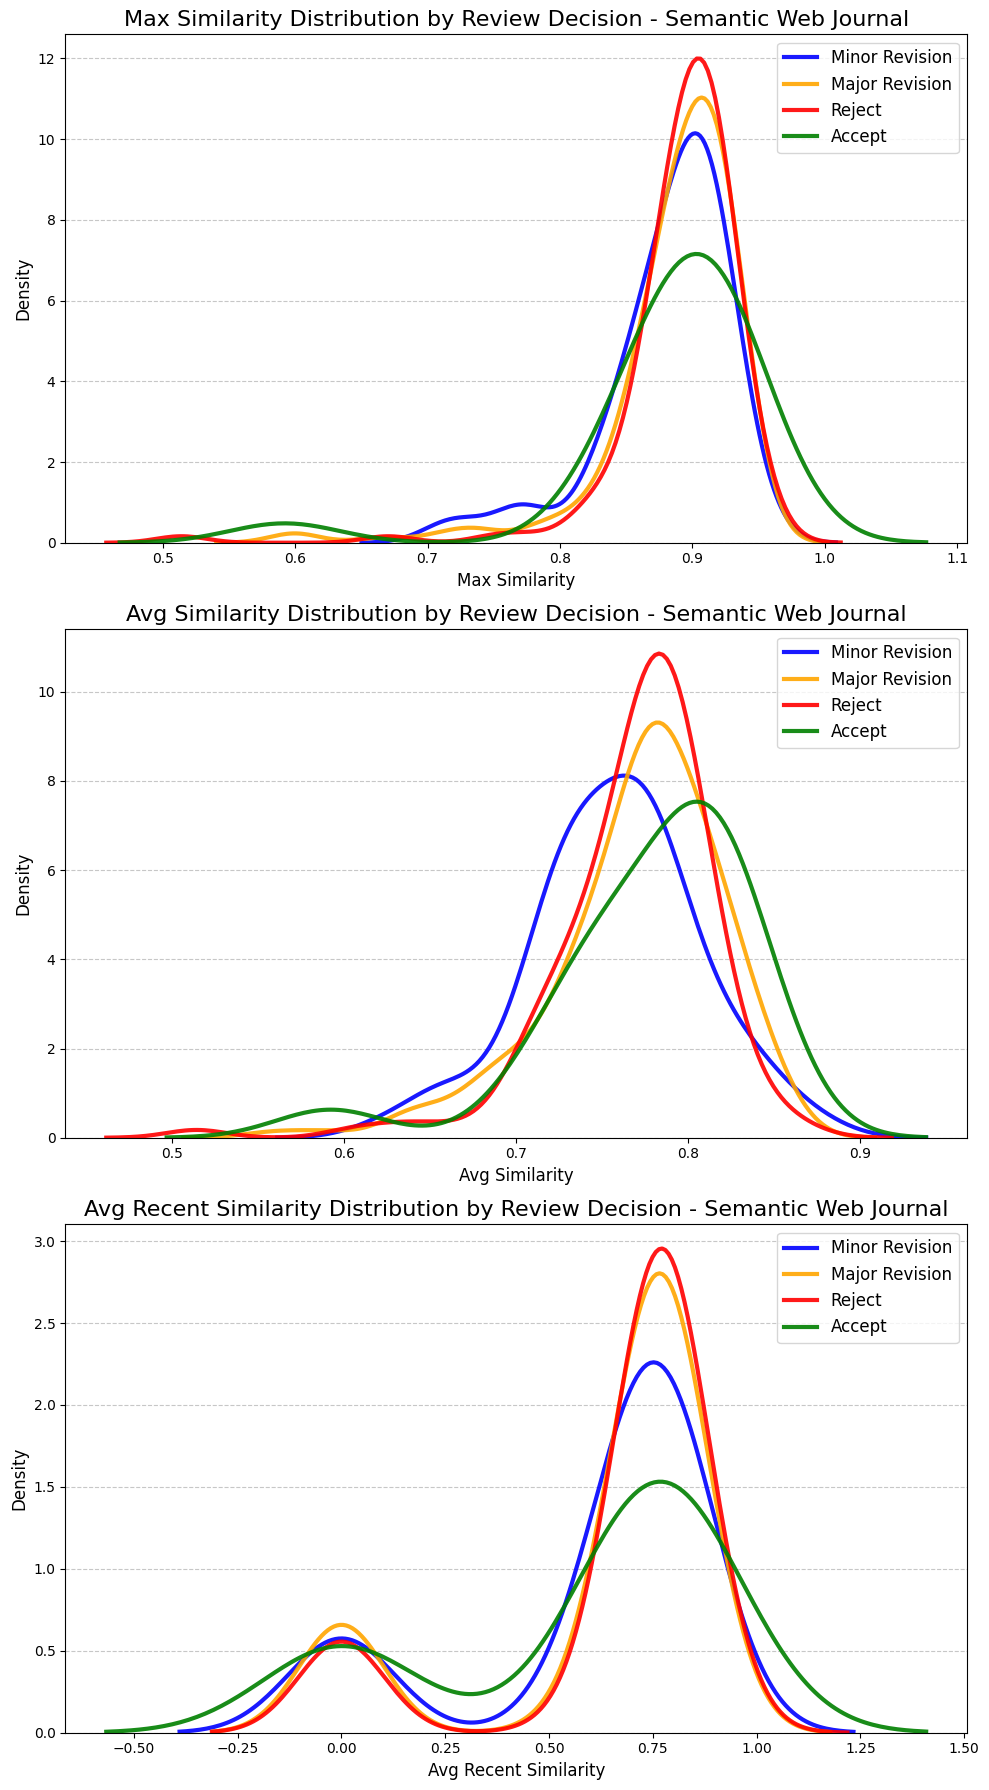

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# list of the three similarity metrics
metrics = ['max_similarity', 'avg_similarity', 'avg_recent_similarity']

# color map for suggestions/decisions
color_map = {
    'Accept': 'green',
    'Approved': 'green',
    'Reject': 'red',
    'Not Approved': 'red',
    'Minor Revision': 'blue',
    'Major Revision': 'orange'
}

# create a single figure with 3 subplots arranged vertically
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))

for ax, metric in zip(axes, metrics):
    for suggestion in df_sw['review_suggestion'].dropna().unique():
        subset = df_sw[
            (df_sw['review_suggestion'] == suggestion) &
            (df_sw[metric].notna())
        ]
        if subset.empty:
            continue

        # pick the color from the map (or default to None)
        line_color = color_map.get(suggestion, None)

        sns.kdeplot(
            data=subset,
            x=metric,
            label=suggestion,
            fill=False,
            alpha=0.9,
            linewidth=3,
            color=line_color,
            ax=ax
        )

    # set titles and labels on each subplot
    ax.set_title(
        f"{metric.replace('_', ' ').title()} Distribution by Review Decision - Semantic Web Journal",
        fontsize=16
    )
    ax.set_xlabel(metric.replace('_', ' ').title(), fontsize=12)
    ax.set_ylabel("Density", fontsize=12)
    ax.legend(title="", fontsize=12, title_fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [64]:
import pandas as pd

# --- load your nested reviewer info for F1000 ---
df_f1000_reviewer = pd.read_pickle('/home/ali/Review_Quality_Benchmark/Soroush/processed/f1000_reviewers_similarity_info.pkl')

df_f1000 = pd.read_csv('f1000research.csv')

# 1. flatten into a lookup DataFrame
records = []
for paper_id, reviewers in df_f1000_reviewer.items():
    for reviewer, metrics in reviewers.items():
        records.append({
            'paper_id':              paper_id + '/v1',
            'reviewer':              reviewer,
            'max_similarity':        metrics.get('max_similarity'),
            'avg_similarity':        metrics.get('avg_similarity'),
            'avg_recent_similarity': metrics.get('avg_recent_similarity')
        })
df_f1000_sim = pd.DataFrame(records)

# 2. merge onto your df_f1000
df_f1000 = df_f1000.merge(
    df_f1000_sim,
    on=['paper_id','reviewer'],
    how='left'
)

# 3. force Anonymous rows to stay null
anon_mask = df_f1000['reviewer'] == 'Anonymous'
df_f1000.loc[anon_mask, ['max_similarity','avg_similarity','avg_recent_similarity']] = None

In [65]:
df_f1000

,paper_id,reviewer,review_date,review_suggestion,length_words,title,abstract,days_to_submit,review_text,mattr,...,smog_index,automated_readability_index,hedge_C,hedge_D,hedge_E,hedge_I,hedge_N,max_similarity,avg_similarity,avg_recent_similarity
0,https://f1000research.com/articles/11-565/v1,Daniel A Nation,19 Jan 2023,Approved,278,Assessing the role of vascular risk factors in...,Background: Although observational studies de...,240,This is a meta-analysis of mendelian randomiza...,0.7832,...,15.4,14.4,93,0,1,1,0,0.917590,0.814638,0.824136
1,https://f1000research.com/articles/11-565/v1,Ahmet Turan Isik,27 Sep 2024,Approved With Reservations,181,Assessing the role of vascular risk factors in...,Background: Although observational studies de...,857,"I have reviewed the manuscript ""Assessing the ...",0.7663,...,13.1,11.4,93,0,0,0,1,0.930216,0.715436,0.751828
2,https://f1000research.com/articles/13-277/v2,Mansoor Rahman,23 Dec 2024,Approved With Reservations,158,Impact of yoga on the central and peripheral v...,Background The aim of this study was to observ...,227,Is the work clearly and accurately presented a...,0.7591,...,13.7,12.3,108,0,0,0,0,NaN,NaN,NaN
3,https://f1000research.com/articles/13-1238/v1,Dr. Talal Shihayb,04 Nov 2024,Approved With Reservations,1128,Do more pregnancies increase the risk of perio...,Background Hormonal changes in pregnancy and t...,19,The authors assessed the effects of number of ...,0.7783,...,15.9,15.6,87,1,2,0,1,NaN,NaN,NaN
4,https://f1000research.com/articles/13-1238/v1,Nancy Ajwa,26 Dec 2024,Approved,295,Do more pregnancies increase the risk of perio...,Background Hormonal changes in pregnancy and t...,71,The current structure provides a good foundati...,0.7944,...,18.2,18.8,101,0,0,0,0,0.834199,0.834199,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9477,https://f1000research.com/articles/1-3/v1,Peter N. Robinson,23 Jul 2012,Approved,666,Low budget analysis of Direct-To-Consumer geno...,Direct-to-consumer (DTC) genetic testing is a ...,7,23andMe and several other companies have been ...,0.7865,...,16.1,16.0,95,0,2,0,0,0.948509,0.766609,0.763406
9478,https://f1000research.com/articles/1-3/v1,Christian Gilissen,26 Jul 2012,Approved,432,Low budget analysis of Direct-To-Consumer geno...,Direct-to-consumer (DTC) genetic testing is a ...,10,This is a well written and interesting article...,0.7506,...,14.6,12.1,96,0,1,0,0,NaN,NaN,NaN
9479,https://f1000research.com/articles/1-1/v1,Suzanne Gaudreault,17 Jul 2012,Approved,270,Knowledge of specific HIV transmission modes i...,"Background: In prior research, Africans who kn...",4,"This is an interesting article, and I think it...",0.7999,...,18.2,19.3,103,2,1,0,0,0.854331,0.755198,0.000000
9480,https://f1000research.com/articles/1-1/v1,Nigel Livesley,27 Jul 2012,Not Approved,633,Knowledge of specific HIV transmission modes i...,"Background: In prior research, Africans who kn...",14,This paper has a number of serious flaws.a) Th...,0.7499,...,14.9,12.5,90,0,1,0,0,0.809905,0.696539,0.000000


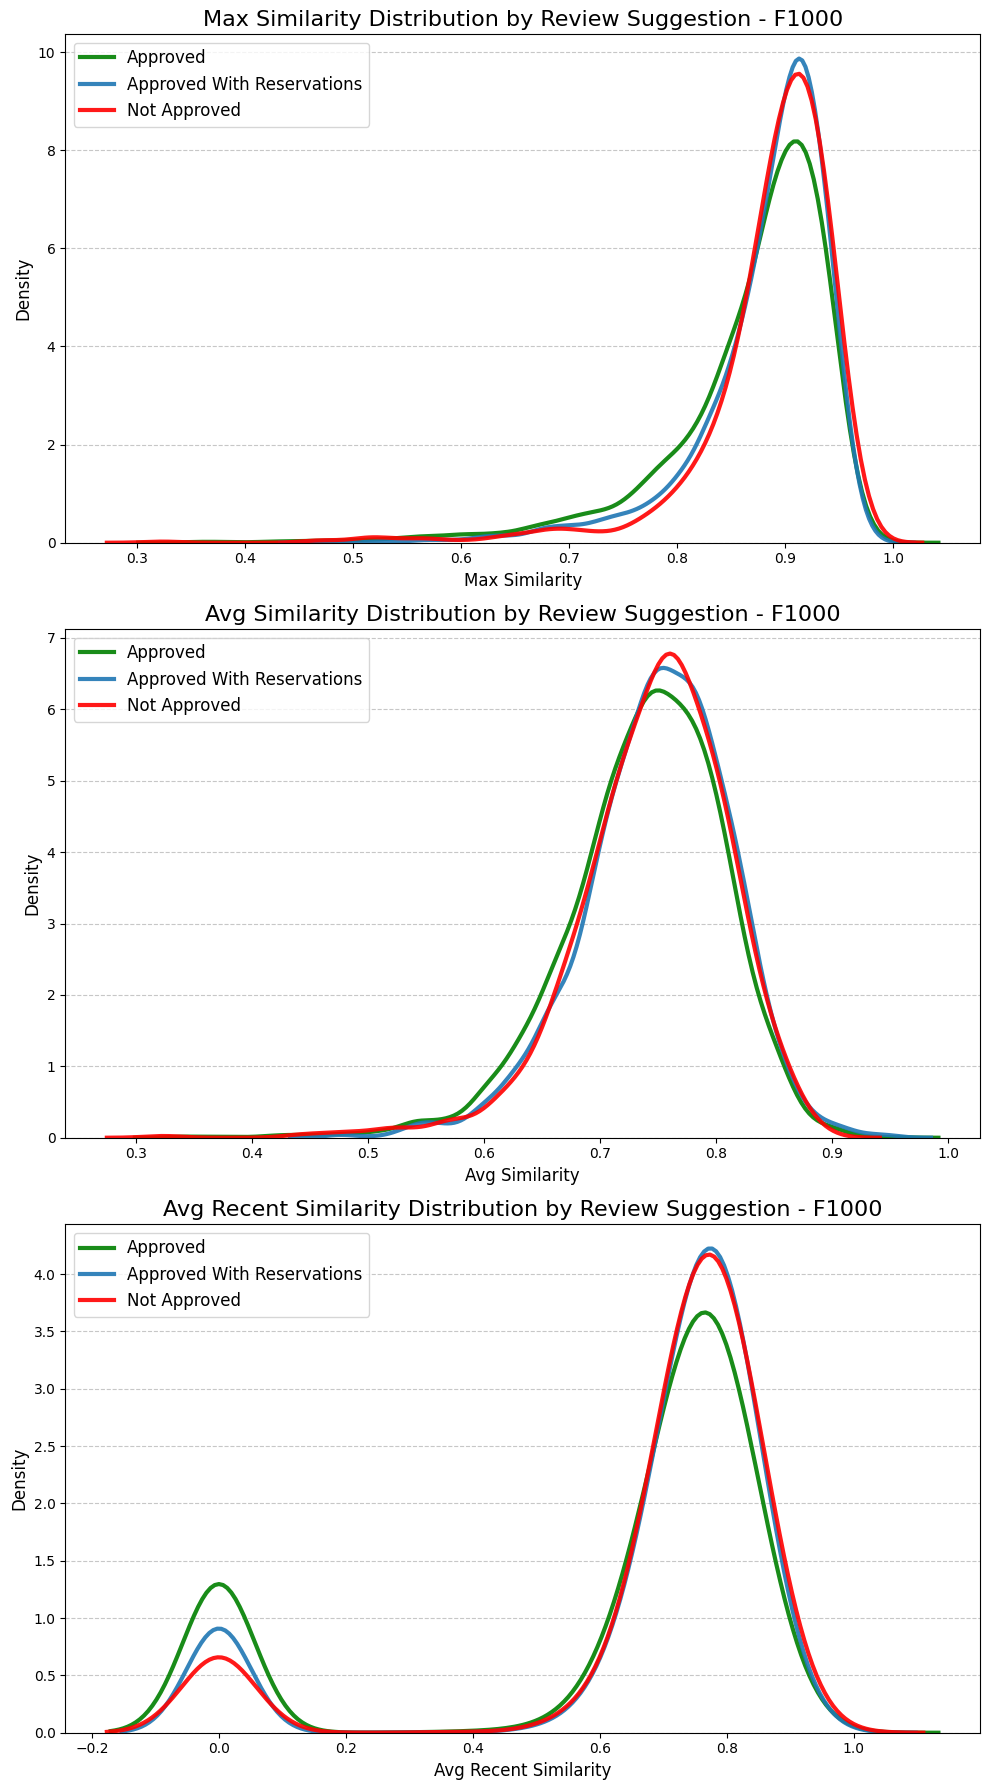

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# list of the three similarity metrics
metrics = ['max_similarity', 'avg_similarity', 'avg_recent_similarity']

# color map for suggestions/decisions
color_map = {
    'Accept': 'green',
    'Approved': 'green',
    'Reject': 'red',
    'Not Approved': 'red',
    'Minor Revision': 'blue',
    'Major Revision': 'orange'
}

# create a single figure with 3 subplots arranged vertically
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))

for ax, metric in zip(axes, metrics):
    for suggestion in df_f1000['review_suggestion'].dropna().unique():
        subset = df_f1000[
            (df_f1000['review_suggestion'] == suggestion) &
            (df_f1000[metric].notna())
        ]
        if subset.empty:
            continue
        # pick color from the map
        line_color = color_map.get(suggestion, None)

        sns.kdeplot(
            data=subset,
            x=metric,
            label=suggestion,
            fill=False,
            alpha=0.9,
            linewidth=3,
            color=line_color,
            ax=ax
        )
    # set titles and labels on each subplot
    ax.set_title(
        f"{metric.replace('_', ' ').title()} Distribution by Review Suggestion - F1000",
        fontsize=16
    )
    ax.set_xlabel(metric.replace('_', ' ').title(), fontsize=12)
    ax.set_ylabel("Density", fontsize=12)
    ax.legend(title="", fontsize=12, title_fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()